## Problem Statement - The objective is to predict whether or not a patient has diabetes, based on some diagnostic measurement

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## EDA

In [4]:
df = pd.read_csv('diabetes.csv')

In [29]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Count of null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Statistical analysis of Data
df.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,30%,40%,50%,60%,75%,85%,90%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,0.000,1.00000,1.000,2.0000,3.0000,4.0000,6.00000,8.00000,9.0000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,57.00000,79.00000,85.000,99.00000,102.000,109.0000,117.0000,125.0000,140.25000,156.00000,167.0000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.00000,38.70000,54.000,62.00000,64.000,68.0000,72.0000,74.0000,80.00000,84.00000,88.0000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,0.000,0.00000,8.200,18.0000,23.0000,27.0000,32.00000,37.00000,40.0000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,0.000,0.00000,0.000,0.0000,30.5000,72.2000,127.25000,179.90000,210.0000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,0.00000,21.80000,23.600,27.30000,28.200,30.1000,32.0000,33.7000,36.60000,39.29500,41.5000,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.14035,0.165,0.24375,0.259,0.3028,0.3725,0.4542,0.62625,0.75655,0.8786,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,22.000,24.00000,25.000,27.0000,29.0000,33.0000,41.00000,46.00000,51.0000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.000,0.00000,0.000,0.0000,0.0000,0.0000,1.00000,1.00000,1.0000,1.00000,1.00


Columns like Glucose, BloodPressure, Skin Thickness, Insulin and BMI have min value as 0. These values cannot be 0. 

In [10]:
# Checking count of 0 values in above column
zero_counts = (df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()
print(zero_counts)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [11]:
df['Glucose'].replace(0, df['Glucose'].median(), inplace=True)
df['BloodPressure'].replace(0, df['BloodPressure'].median(), inplace=True)
df['SkinThickness'].replace(0, df['SkinThickness'].median(), inplace=True)
df['Insulin'].replace(0, df['Insulin'].median(), inplace=True)
df['BMI'].replace(0, df['BMI'].median(), inplace=True)

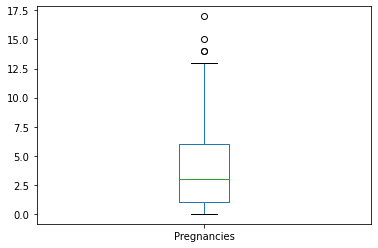

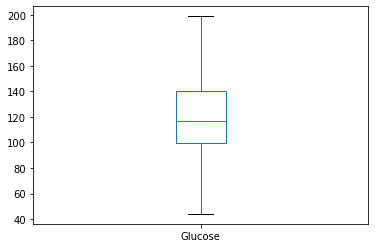

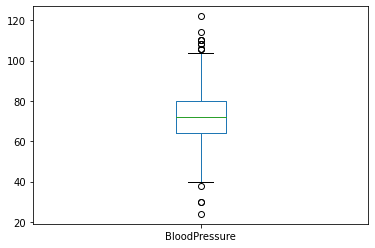

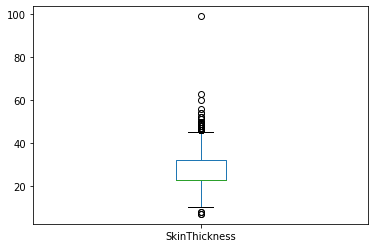

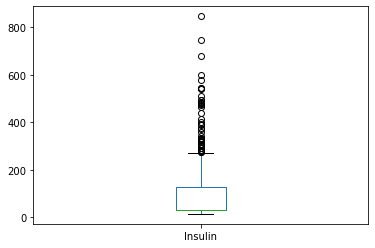

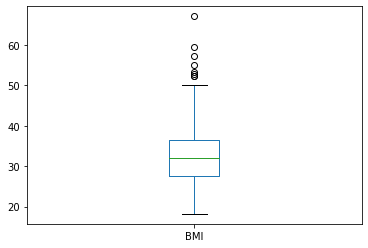

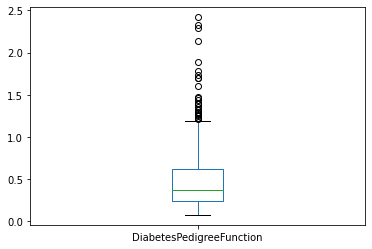

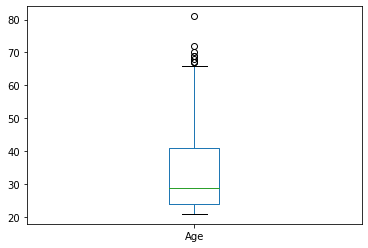

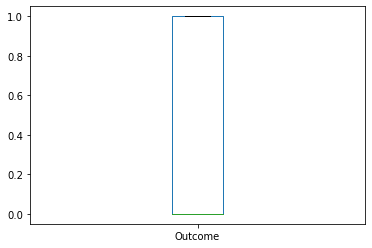

In [12]:
# Outlier detection using Boxplot
for columns in df:
    df.boxplot(column=columns, grid=False)
    plt.show()

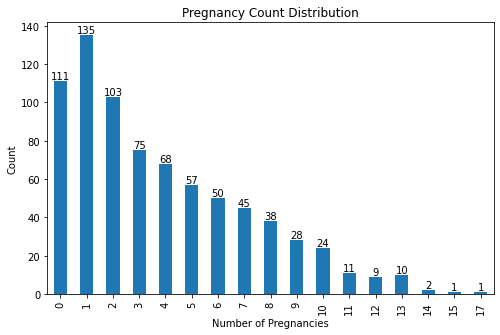

In [13]:
plt.figure(figsize=(8,5))

ax = df['Pregnancies'].value_counts().sort_index().plot(kind='bar') # calculate count of each unique value in the column
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
               (p.get_x() + p.get_width() / 2, p.get_height()),
               ha='center', va='center', fontsize=10, xytext=(0,5), textcoords='offset points')
    

plt.title('Pregnancy Count Distribution')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.show()

Most of the people considered for the study where pregnant only once.

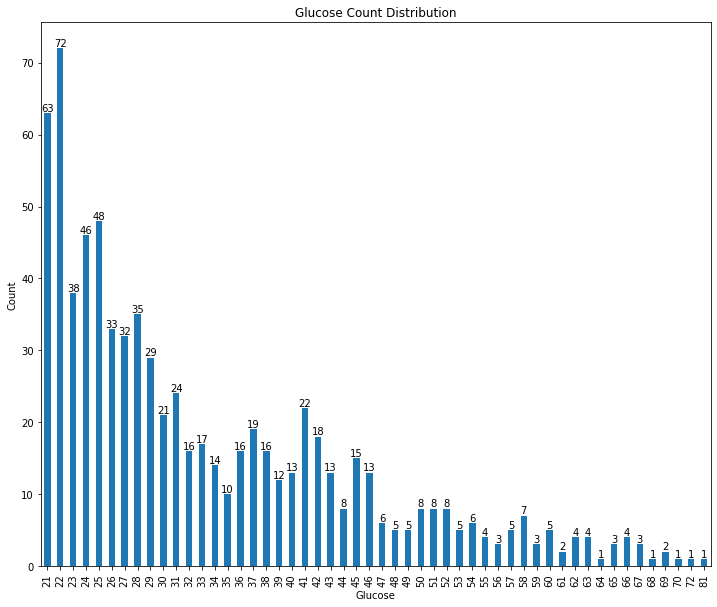

In [14]:
plt.figure(figsize=(12,10))

ax = df['Age'].value_counts().sort_index().plot(kind='bar') # calculate count of each unique value in the column
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
               (p.get_x() + p.get_width() / 2, p.get_height()),
               ha='center', va='center', fontsize=10, xytext=(0,5), textcoords='offset points')
    

plt.title('Glucose Count Distribution')
plt.xlabel('Glucose')
plt.ylabel('Count')
plt.show()

The Age group of the people in consideration are from 21-81.

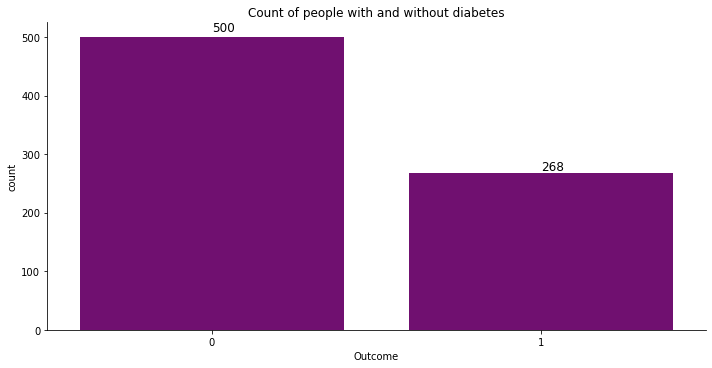

In [15]:
g = sns.catplot(x = "Outcome", data=df, aspect=2, kind="count", color='purple')
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() * 1.02, 
            format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.title('Count of people with and without diabetes', color='black')
plt.show()

The dataset is imbalanced.

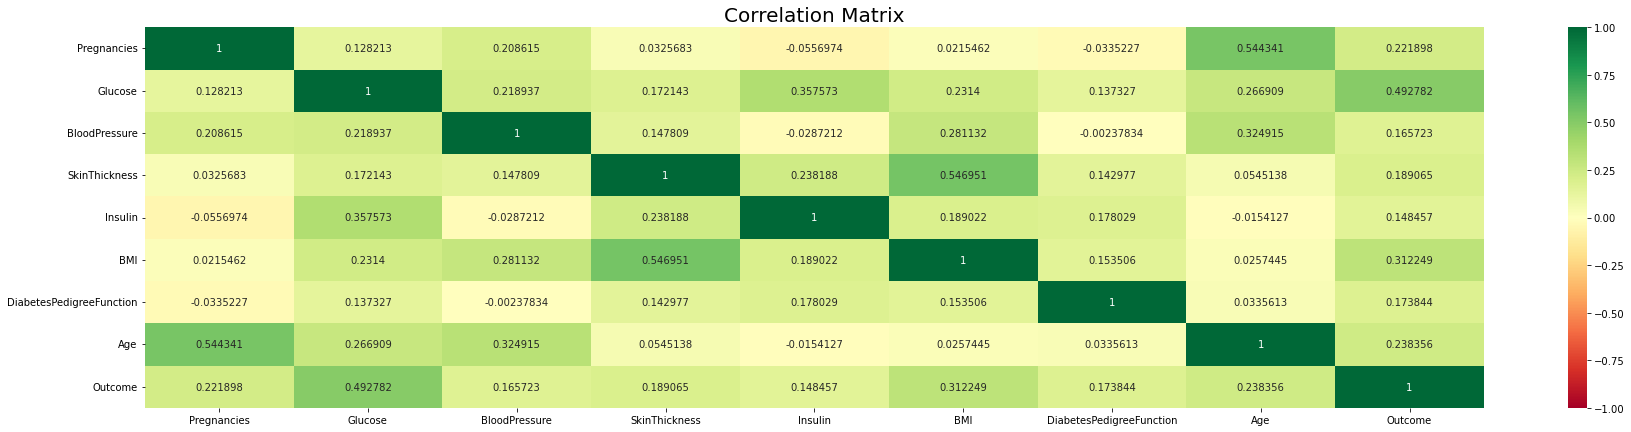

In [16]:
# Correlation Matrix Plotting
plt.figure(figsize=(30,7)) 
plt.title("Correlation Matrix", fontsize=20)
sns.heatmap(df.corr(),cmap='RdYlGn',annot=True,vmax=1.0,vmin=-1.0,fmt='g')  
#cmap is the color for heatmap, annot=True is to show the correlation matrix value on heatmap
#vmax and vmin are the threshold for the heatmap and fmt will create a scale
plt.show()

There is no high correlation among the variables.

In [17]:
# Split to X and y
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [20]:
# Train_test split 75:25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

## Balancing Dataset

In [21]:
smote=SMOTE()
X_train_balanced,y_train_balanced=smote.fit_resample(X_train,y_train)

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_balanced, y_train_balanced)

LogisticRegression(random_state=0)

# Model Evaluation

In [23]:
y_pred_logreg = logreg.predict(X_test)

In [24]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print(f'Accuracy : {metrics.accuracy_score(y_test, y_pred_logreg)}')
print(f'Precision : {metrics.precision_score(y_test, y_pred_logreg)}')
print(f'Recall : {metrics.recall_score(y_test, y_pred_logreg)}')

Accuracy : 0.7135416666666666
Precision : 0.5975609756097561
Recall : 0.6901408450704225


71%  of predictions where correct.

Precision 59.7% means when the model predicted someone has diabetes 59.7% chance is there that it is correct

Recall is 69% means the model could identify 69% diabetic people correctly and it missed 30% of actual diabetic people.